# Prediction using Pretrained Model

## Import dependencies

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
from distutils.version import LooseVersion
import warnings

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer'
print('TensorFlow Version: {}'.format(tf.__version__))

%matplotlib inline

TensorFlow Version: 1.3.0


## Load MNIST data

In [2]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## Restore model and predict on test data 

INFO:tensorflow:Restoring parameters from ./trained/test_model
Ground Truth Value of image :  6
Predicted Value of image :  6


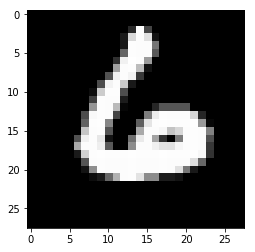

In [4]:
sess = tf.Session()

saver=tf.train.import_meta_graph('trained/test_model.meta')
saver.restore(sess, tf.train.latest_checkpoint('./trained/'))

graph = tf.get_default_graph()

output = graph.get_tensor_by_name("output_fc_layer/outputs:0")

inputs = graph.get_tensor_by_name("Inputs:0")
targets = graph.get_tensor_by_name("Labels:0")
keep_prob = graph.get_tensor_by_name("keep_prob:0")
learning_rate = graph.get_tensor_by_name("learning_rate:0")

pred = tf.nn.softmax(output)
img_predict_index = np.random.randint(mnist.test.images.shape[0])
img_array = 255 * mnist.test.images[img_predict_index]
img_array = img_array.astype("uint8")
plt.imshow(img_array.reshape([28,28]))
plt.gray()

predictions = sess.run(pred, feed_dict={inputs:mnist.test.images[img_predict_index].reshape(1,784), 
                                        targets: mnist.test.labels[img_predict_index].reshape(1,10), 
                                        keep_prob:1.0, learning_rate:0.0001})

print("Ground Truth Value of image : ", np.argmax(mnist.test.labels[img_predict_index]))
print("Predicted Value of image : ",np.argmax(predictions[0]))

sess.close()